In [2]:
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import datetime as dt  

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [4]:
Base = automap_base()

Base.prepare(engine, reflect=True)

In [5]:
Base.classes.keys()

['measurement', 'station']

In [6]:
Station = Base.classes.station
Measurement = Base.classes.measurement

In [7]:
session = Session(engine)

In [8]:
prev_year = dt.date.today() - dt.timedelta(days=365)

In [9]:
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

<IPython.core.display.Javascript object>


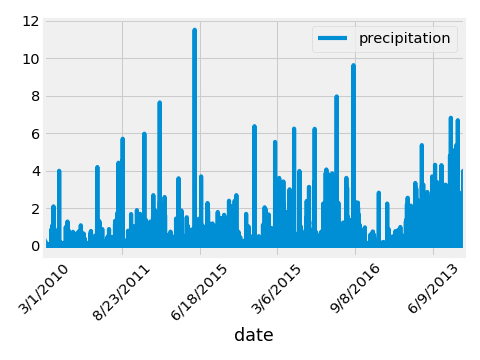

In [10]:
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.set_index(df['date'], inplace=True)

df.plot(x_compat=True)

plt.xticks(rotation='45')
plt.tight_layout()
plt.show()

In [11]:
session.query(func.count(Station.station)).all()

[(9)]

In [12]:
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

USC00519281 WAIHEE 837.5, HI US has the most observations

In [13]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

<IPython.core.display.Javascript object>


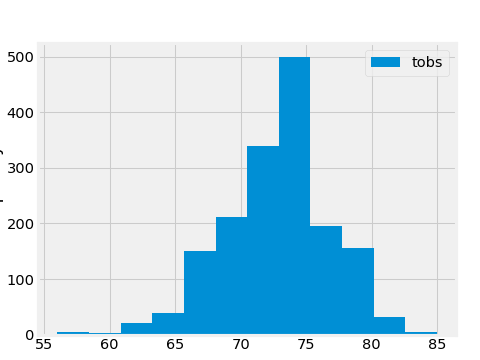

In [14]:
prev_year = dt.date.today() - dt.timedelta(days=365)

results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.show()